# JEST internal workshop &#8594; Intro to OpenCV (Crash Course)

![](https://raw.githubusercontent.com/tamagusko/workshop-intro-opencv/main/img/head.png)

## Basic info
Version: 0.1 (2021-09-22)  
© Tiago Tamagusko (tamagusko@uc.pt)<br>
License: [LICENSE](/LICENSE)

## Requirements

- Have a Google account.

## Installation

Go to the [link](https://colab.research.google.com/github/tamagusko/workshop-intro-opencv/blob/main/introOpenCV.ipynb) and make a copy.


## Topics

1. Open Computer Vision (OpenCV) fundamentals (15 min);
2. Edge detection (15 min);
3. Cascade classification (15 min);
4. Red signal detection (15 min).
---

## 1. OpenCV
Estimated time needed: **15 min**

In [1]:
import cv2 # opencv
import numpy as np

%matplotlib inline 
from matplotlib import pyplot as plt
import pylab # control figure size 
pylab.rcParams['figure.figsize'] = (10, 8)

In [2]:
# check OpenCV version
cv2.__version__

'4.5.1'

In [41]:
# download images

!wget --no-check-certificate \
    https://raw.githubusercontent.com/tamagusko/intro_opencv/main/img/coimbra.jpg \
    -O img/coimbra.jpg
    
!wget --no-check-certificate \
    https://raw.githubusercontent.com/tamagusko/intro_opencv/main/img/elon_musk.jpg \
    -O img/elon_musk.jpg
    
!wget --no-check-certificate \
    https://raw.githubusercontent.com/tamagusko/intro_opencv/main/img/rectangle.png \
    -O img/rectangle.png

--2021-09-19 10:44:37--  https://raw.githubusercontent.com/tamagusko/intro_opencv/main/img/coimbra.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 710131 (693K) [image/jpeg]
Saving to: ‘img/coimbra.jpg’

img/coimbra.jpg     100%[===================>] 693,49K  3,72MB/s    in 0,2s    

2021-09-19 10:44:38 (3,72 MB/s) - ‘img/coimbra.jpg’ saved [710131/710131]

--2021-09-19 10:44:38--  https://raw.githubusercontent.com/tamagusko/intro_opencv/main/img/elon_musk.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239507 (234K) [imag

In [25]:
# open image
coimbra=cv2.imread('img/coimbra.jpg')

In [26]:
# getting image properties
def image_measure(img):
    height, width  = img.shape[:2]
    return width, height

print('Image properties \n---')
print(f'Size: {image.size} \nShape: {image_measure(coimbra)} \nType: {image.dtype}')

Image properties 
---
Size: 9437184 
Shape: (2048, 1536) 
Type: uint8


### Original image

![](https://raw.githubusercontent.com/tamagusko/workshop-intro-opencv/main/img/coimbra.jpg)

### OpenCV stored image:

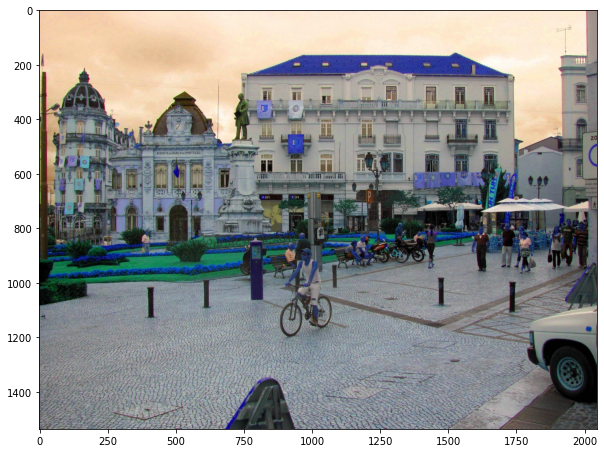

In [27]:
plt.imshow(coimbra)

# in a .py application use: cv2.imshow(coimbra) 

IMPORTANT: OpenCV does not store images in RGB format, but in BGR format.

### Converting the image to standard RGB

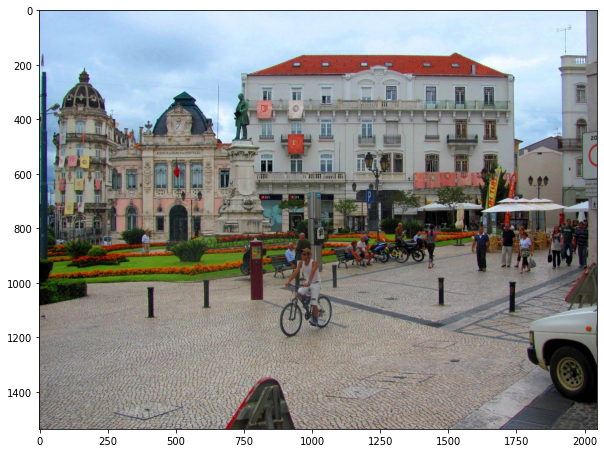

In [28]:
# split color channels
b,g,r=cv2.split(coimbra)
rgb_image=cv2.merge([r,g,b])

plt.imshow(rgb_image)

### There is an OpenCV function to convert the image to RGB

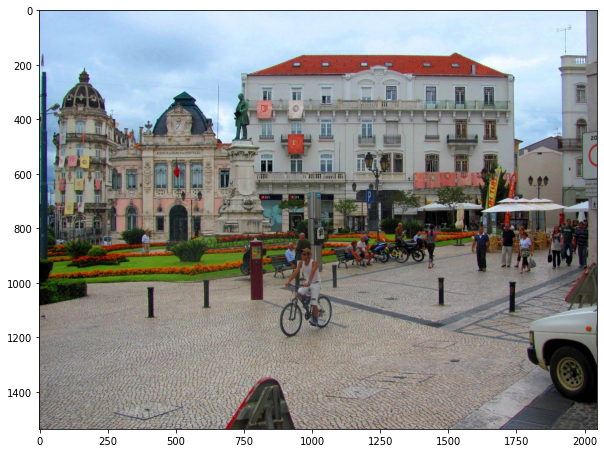

In [29]:
rgb_image_2=cv2.cvtColor(coimbra, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image_2)

### Slicing a part of the image

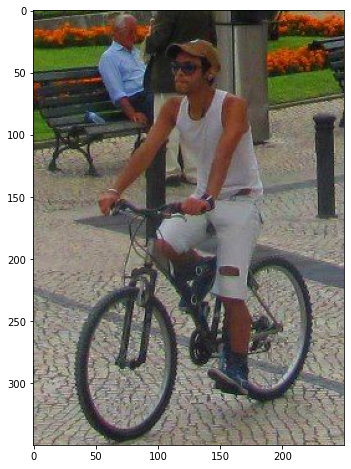

In [30]:
cyclist = rgb_image_2[850:1200, 850:1100]
plt.imshow(cyclist)

### Manipulating images

Images in OpenCV are numpy arrays, so you can easily manipulate the images.

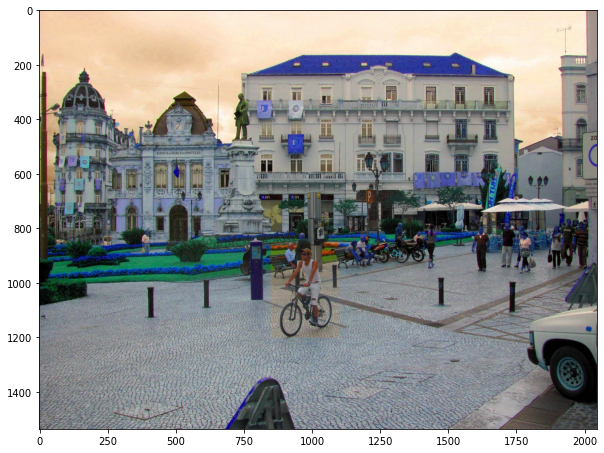

In [32]:
# slice + paste
image[850:850+cyclist.shape[0], 850:850+cyclist.shape[1]]=cyclist
plt.imshow(image)

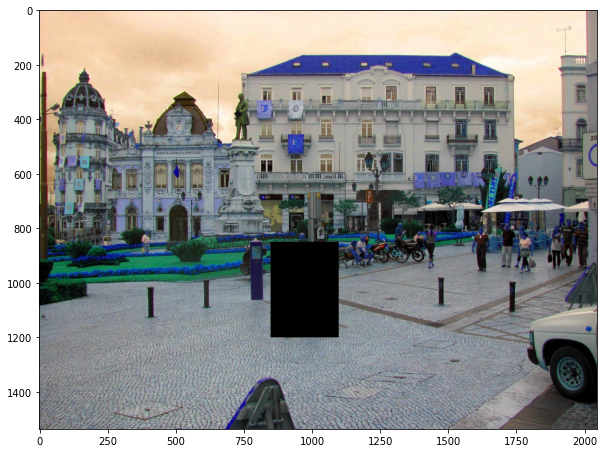

In [33]:
# covering an area of the figure
rectangle = np.zeros((cyclist.shape[0],cyclist.shape[1],3), np.uint8) # black rectangle
image[850:850+rectangle.shape[0], 850:850+rectangle.shape[1]]=rectangle
plt.imshow(image)

### Draw a retangle around a region

x1,y1 ------
|          |
|          |
|          |
--------x2,y2

### Rotate image

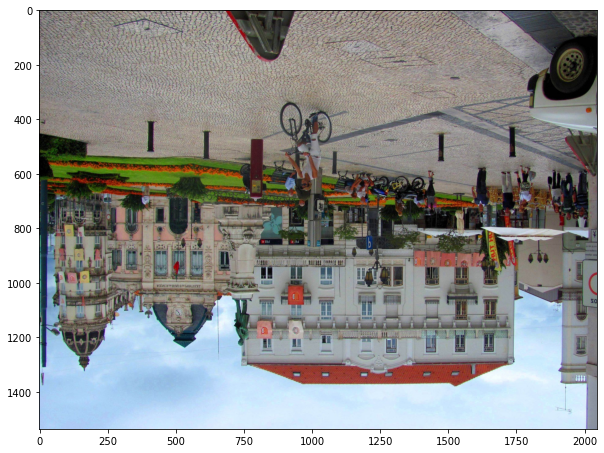

In [35]:
rotate_image_vertical=cv2.flip(rgb_image_2,0) # vertical
plt.imshow(rotate_image_vertical)

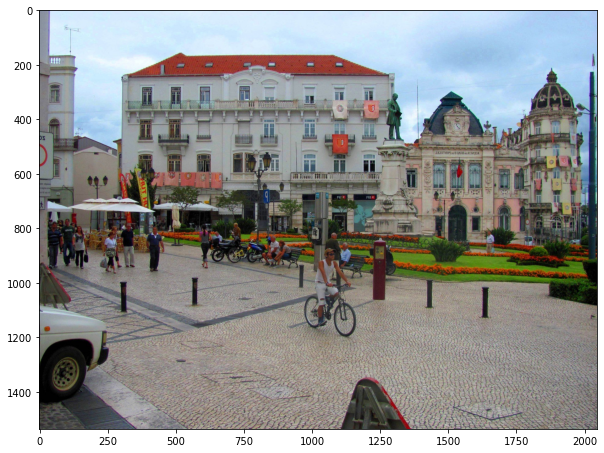

In [36]:
rotate_image_horizonal=cv2.flip(rgb_image_2,1) # horizontal
plt.imshow(rotate_image_horizonal)

## 2. Edge detection
Estimated time needed: **15 min**

In [17]:
elon_musk=cv2.imread('img/elon_musk.jpg')

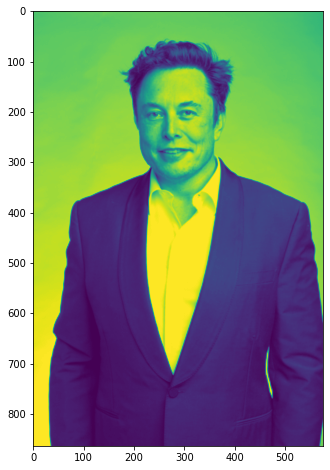

In [18]:
# convert to graycsale
img_gray = cv2.cvtColor(elon_musk, cv2.COLOR_BGR2GRAY)
# blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
plt.imshow(img_blur)

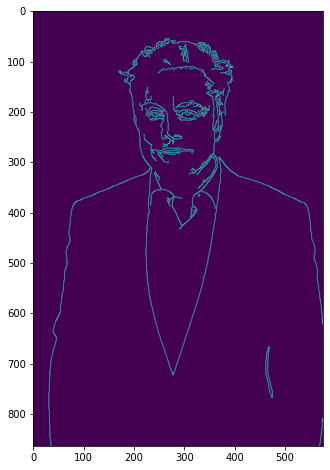

In [19]:
# canny edge detection

edges_wide = cv2.Canny(image=img_blur, threshold1=10, threshold2=200)
plt.imshow(edges_wide)

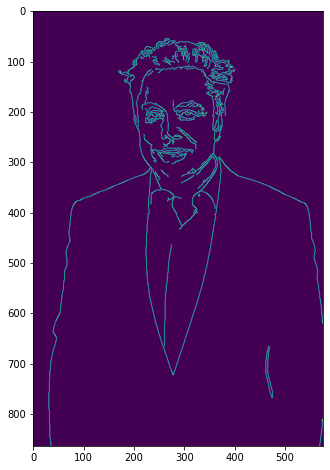

In [20]:
edges_mid = cv2.Canny(image=img_blur, threshold1=30, threshold2=150)
plt.imshow(edges_mid)

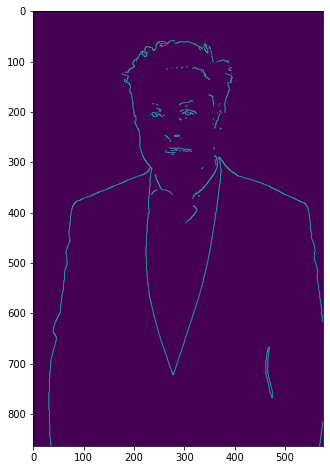

In [21]:
edges_tight = cv2.Canny(image=img_blur, threshold1=240, threshold2=250)
plt.imshow(edges_tight)

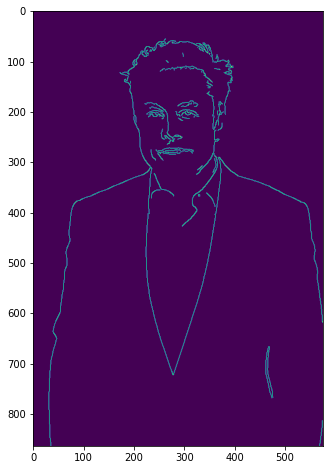

In [22]:
edges = cv2.Canny(image=img_blur, threshold1=120, threshold2=200)
plt.imshow(edges)

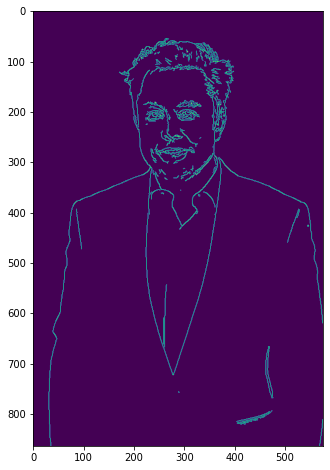

In [39]:
edges_original = cv2.Canny(image=elon_musk, threshold1=120, threshold2=200)
plt.imshow(edges_original)

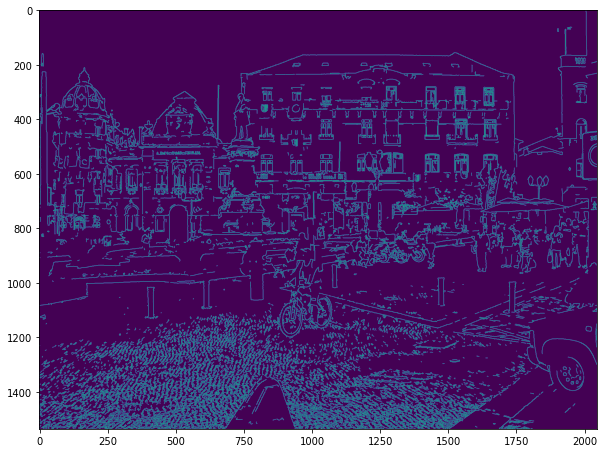

In [37]:
image_gray = cv2.cvtColor(coimbra, cv2.COLOR_BGR2GRAY)
# blur the image for better edge detection
image_blur = cv2.GaussianBlur(image_gray, (3,3), 0) 

edges2 = cv2.Canny(image=image_blur, threshold1=120, threshold2=200)
plt.imshow(edges2)

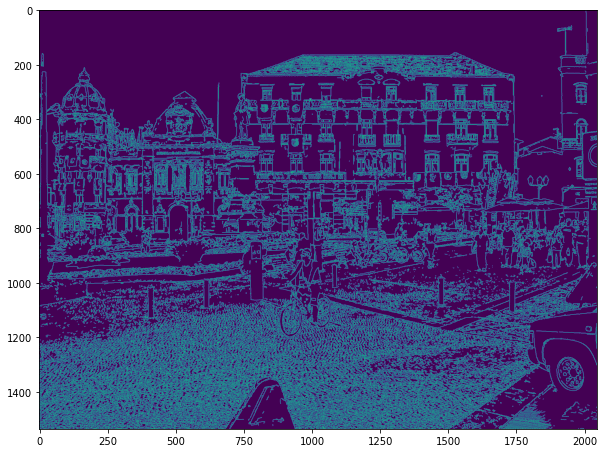

In [40]:
edges_original_2 = cv2.Canny(image=coimbra, threshold1=120, threshold2=200)
plt.imshow(edges_original_2)

## 3. Cascade classification
Estimated time needed: **15 min**

In [ ]:
# https://medium.com/@murlijadhav007/opencv-for-begginers-part-i-af1a32180a9a
# https://colab.research.google.com/github/computationalcore/introduction-to-opencv/blob/master/notebooks/3-Features.ipynb#scrollTo=JdU2qm635NZC